https://dcase-repo.github.io/dcase_util/tutorial_containers.html

In [1]:
import dcase_util as du
import numpy as np
import matplotlib.pyplot as plt

Dictionaries https://dcase-repo.github.io/dcase_util/tutorial_containers.html#dictionaries

In [2]:
dict_container = du.containers.DictContainer(
    {
        'test': {
            'field1': 1,
            'field2': 2,
        },
        'test2': 100,
        'test3': {
            'field1': {
                'fieldA': 1
            },
            'field2': {
                'fieldA': 1
            },
            'field3': {
                'fieldA': 1
            },
        }
    }
)

In [3]:
# Field exists
value = dict_container.get_path('test.field1')
print(value)

# Using wild card
values = dict_container.get_path('test3.*')
print(values)

# Non existing field with default value
value = dict_container.get_path('test.fieldA', 'default_value')
print(value)

1
[{'fieldA': 1}, {'fieldA': 1}, {'fieldA': 1}]
default_value


In [4]:
# Field exists
value = dict_container.get_path(['test', 'field1'])
print(value)

# Non existing field with default value
value = dict_container.get_path(['test', 'fieldA'], 'default_value')
print(value)

1
default_value


In [5]:
# Setting field through dotted path:
dict_container.set_path('test.field2', 200)

# Getting dotted path to all leaf nodes in the nested dictionary:
dict_container.get_leaf_path_list()

# Getting dotted path to all leaf nodes which starts with ‘field’ in the nested dictionary:
dict_container.get_leaf_path_list(target_field_startswith='field')

# To save the container into YAML-file:
dict_container.save(filename='test.yaml')

# To load the container data from YAML-file:
dict_container.load(filename='test.yaml')
print(dict_container)

DictContainer :: Class
  filename                          : test.yaml 
  test
    field1                          : 1
    field2                          : 200
  test2                             : 100
  test3
    field1
      fieldA                        : 1
    field2
      fieldA                        : 1
    field3
      fieldA                        : 1



List of Dictionaries https://dcase-repo.github.io/dcase_util/tutorial_containers.html#list-of-dictionaries

In [6]:
listdict_container = du.containers.ListDictContainer(
    [
        {'field1': 1, 'field2': 2},
        {'field1': 10, 'field2': 20},
        {'field1': 100, 'field2': 200},
    ]

)

In [7]:
# Access item in the list based on key and value:
print(listdict_container.search(key='field1', value=10))

# Getting values in specific field of the dictionaries:
print(listdict_container.get_field(field_name='field2'))


DictContainer :: Class
  field1                            : 10
  field2                            : 20

[2, 20, 200]


Data Containers https://dcase-repo.github.io/dcase_util/tutorial_containers.html#data-containers

In [8]:
data_container = du.containers.DataMatrix2DContainer(
  data=np.random.rand(10,100),
  time_resolution=0.02
)

In [9]:
print(data_container.data.shape)

(10, 100)


In [10]:
data_container.show()

DataMatrix2DContainer :: Class
  Data
    data                            : matrix (10,100) 
    Dimensions
      time_axis                     : 1 
    Timing information
      time_resolution               : 0.02 sec
  Meta
    stats                           : Calculated 
    metadata                        : - 
    processing_chain                : - 
  Duration
    Frames                          : 100 
    Seconds                         : 2.00 sec
  Data
    Dimensions
      time_axis                     : 1 
      data_axis                     : 0 



In [11]:
print(data_container.set_focus(start_seconds=0.5, stop_seconds=1.0).get_focused().shape)

(10, 25)


In [12]:
print(data_container.set_focus(start=10, stop=50).get_focused().shape)

(10, 40)


In [13]:
data_container.get_frames(frame_ids=[1,2,10,30])

array([[0.61051709, 0.98381377, 0.30329867, 0.526482  ],
       [0.67130877, 0.37460935, 0.37456227, 0.4526802 ],
       [0.13714757, 0.13932525, 0.85339085, 0.66468804],
       [0.36685957, 0.24029906, 0.70780082, 0.15129926],
       [0.356527  , 0.24283438, 0.97456343, 0.38213521],
       [0.89578901, 0.48711317, 0.59422526, 0.47129739],
       [0.59894259, 0.44993845, 0.34369989, 0.38607339],
       [0.93135418, 0.71232461, 0.37302765, 0.43918417],
       [0.65217541, 0.28807167, 0.09624426, 0.68283206],
       [0.00694136, 0.98467039, 0.28370355, 0.57840194]])

In [14]:
data_container.get_frames(frame_ids=[1,2,3,4,5], vector_ids=[0])

array([[0.61051709, 0.98381377, 0.49689415, 0.63794546, 0.83371444]])

In [15]:
transposed_data = data_container.T
print(transposed_data.shape)

(100, 10)


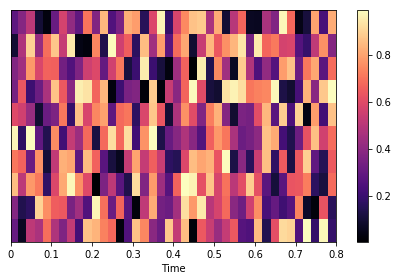

In [16]:
data_container.plot()

Repositories https://dcase-repo.github.io/dcase_util/tutorial_containers.html#repositories

In [17]:
data_repository = du.containers.DataRepository(
    data={
        'label1': {
            'stream0': {
                'data': np.random.rand(10,10)
            },
            'stream1': {
                'data': 200
            }
        },
        'label2': {
            'stream0': {
                'data': 300
            },
            'stream1': {
                'data': data_container
            }
        }
    }
)

In [18]:
data_repository.show()

DataRepository :: Class
  Repository info
    Item class                      : DataMatrix2DContainer 
    Item count                      : 2 
    Labels                          : ['label1', 'label2'] 
  Content
    [label1][stream0]               : {'data': array([[0.42324306, 0.38144741, 0.62836757, 0.94016492, 0.67630502,
                                              0.65233616, 0.71434583, 0.13594444, 0.91263619, 0.07848622],
                                             [0.98197505, 0.72823115, 0.57174518, 0.03078243, 0.79204918,
                                              0.866959  , 0.38050826, 0.63903859, 0.41178069, 0.21286139],
                                             [0.76939298, 0.61990138, 0.85171427, 0.26728557, 0.07063182,
                                              0.4897628 , 0.22002281, 0.48969212, 0.44332664, 0.96798037],
                                             [0.06665822, 0.79646213, 0.11853288, 0.42296997, 0.71858854,
                                

In [19]:
# Accessing data inside repository:
data_repository.get_container(label='label1',stream_id='stream1')

{'data': 200}

In [20]:
# Setting data:
data_repository.set_container(label='label3',stream_id='stream0', container={'data':500})
data_repository.show()

DataRepository :: Class
  Repository info
    Item class                      : DataMatrix2DContainer 
    Item count                      : 3 
    Labels                          : ['label1', 'label2', 'label3'] 
  Content
    [label1][stream0]               : {'data': array([[0.42324306, 0.38144741, 0.62836757, 0.94016492, 0.67630502,
                                              0.65233616, 0.71434583, 0.13594444, 0.91263619, 0.07848622],
                                             [0.98197505, 0.72823115, 0.57174518, 0.03078243, 0.79204918,
                                              0.866959  , 0.38050826, 0.63903859, 0.41178069, 0.21286139],
                                             [0.76939298, 0.61990138, 0.85171427, 0.26728557, 0.07063182,
                                              0.4897628 , 0.22002281, 0.48969212, 0.44332664, 0.96798037],
                                             [0.06665822, 0.79646213, 0.11853288, 0.42296997, 0.71858854,
                      